## Riksarkivet SBL  - Wikidata ett försök att synka och dansa med dom
version 0.46 this [notebook](https://github.com/salgo60/open-data-examples/blob/master/SBL.ipynb)

WD egenskap [Property:P3217](https://www.wikidata.org/wiki/Property:P3217) 
* SBL personartiklar som saknar [sv:Wikipedia artikel](https://w.wiki/c5f) < 150
* [SBL vs SKBL female articles](https://github.com/salgo60/open-data-examples/blob/master/Svenskt%20Kvinnobiografiskt%20lexikon%20part%203.ipynb)  

#### Andra källor vi synkar
* [Kulturpersoner Uppsalakyrkogård](https://github.com/salgo60/open-data-examples/blob/master/Check%20WD%20kulturpersoner%20uppsalakyrkogardar.ipynb)
* [Litteraturbanken](https://github.com/salgo60/open-data-examples/blob/master/Litteraturbanken%20Author.ipynb) 
  * WD property [P5101](https://www.wikidata.org/wiki/Property_talk:P5101) [P5123](https://www.wikidata.org/wiki/Property_talk:P5123)
* [Nobelprize.org](https://github.com/salgo60/open-data-examples/blob/master/Nobel%20API.ipynb)
  * WD [property 8024](https://www.wikidata.org/wiki/Property:P8024)
* [SBL](https://github.com/salgo60/open-data-examples/blob/master/SBL.ipynb) 
  * WD [property 3217](https://www.wikidata.org/wiki/Property:P3217) 
* [SKBL](https://github.com/salgo60/open-data-examples/blob/master/Svenskt%20Kvinnobiografiskt%20lexikon%20part%203.ipynb)
  * WD [property 4963](https://www.wikidata.org/wiki/Property:P4963)
* [Svenska Akademien](https://github.com/salgo60/open-data-examples/blob/master/Svenska%20Akademien.ipynb) 
  * WD [property 5325](https://www.wikidata.org/wiki/Property:P5325) 

### SBL
SBL har idag
* personartiklar
* släktartiklar
  * en person i en släktartikel kan ha en sida som bara pekar till släktartikeln (med text ej alltid länk)

Det saknas idag från Riksarkivet ett API så nedanstående är ett försök att webscrapa deras data och sedan försöka hitta en struktur. 

Målsättningen är att ha personerna som har en SBL personartikel representerade i Wikidata. Kul vore att även ha släktartiklarna kopplade till Wikidata... är inte säkert hur bra strukturen är för släkter/ätter/familjer i WD och sedan behövs det matchas en hel del. En person kan även omnämnas i en släktartikel och bör då i Wikidata ha "beskriven av källa" kopplad till dessa artiklar (exempel Gunnar Morssing [Q5994570#P1343](https://www.wikidata.org/wiki/Q5994570#P1343) som finns i artikel SBL ["Morssing, släkt"](https://sok.riksarkivet.se/sbl/Presentation.aspx?id=9512)) vilket är ett mycket stort jobb om Riksarkivet inte går över till att leverera [länkade data](https://sv.wikipedia.org/wiki/L%C3%A4nkade_data)... se förfrågan om bättre metadata 2019 okt 30 [T236883](https://phabricator.wikimedia.org/T236883)    

**Mina gissningar** 
1. sida med född/död är en person
2. sida med titel släkt är en släktartikel
3. sida med född/död men för kort kan vara en referens till en släktartikel
4. släkt artikel kan ha "[ätt](https://sok.riksarkivet.se/sbl/Search.aspx?t=0)" i titeln men det kan visst även person artiklar ha
5. ....

### jmf SKBL med SBL 
med ett mera komplett Wikidata kan vi nu jämföra [Svenskt Kvinnobiografiskt lexikon - SKBL](https://www.skbl.se/sv/om-skbl) med [Riksarkivet](https://sok.riksarkivet.se/sbl/OmSBL.aspx) då det gäller urval av kvinnor, antal kvinnor, hur dom levererar, API vs. inte API, skillnaden att ha enbart svenska artiklar som SBL med att även ha [engelska artiklar som SKBL](https://www.skbl.se/en/about-skbl) 

* [Notebook](https://github.com/salgo60/open-data-examples/blob/master/Svenskt%20Kvinnobiografiskt%20lexikon%20part%203.ipynb)

# Webscrape 
1. vi gissar id min 4000 och max 40000


In [1]:
from datetime import datetime
now = datetime.now()
print("Last run: ", now)

Last run:  2021-03-08 18:47:42.857237


In [2]:
import urllib3, json
import pandas as pd   
from bs4 import BeautifulSoup
import sys
import pprint
http = urllib3.PoolManager()

from tqdm.notebook import trange  
listNewItems =[]

for SBLnr in trange(4000,40000): #gissar min 4000 max 40000
    url = "https://sok.riksarkivet.se/sbl/Presentation.aspx?id=" + str(SBLnr)
    r = http.request('GET', url) 
    if len(r.data) > 11020:
        new_item = dict()
        #print(SBLnr)
        new_item['SBLnr'] = SBLnr
        new_item['SBLlength'] = len(r.data)
        soup = BeautifulSoup(r.data, "html.parser")  
        
        try:
            titel = soup.findAll("span", {"id": "ctl00_MainContent_lblTitle"})[0].get_text()
            new_item['titel'] = titel
            #print ("\t",titel)
        except:
            pass
        try:
            Fodd = soup.findAll("span", {"id": "ctl00_MainContent_lblFodelse"})[0].get_text()
            #print ("\t",Fodd)
            new_item['Fodd'] = Fodd
        except:
            pass
        try:
            Dod = soup.findAll("span", {"id": "ctl00_MainContent_lblDod"})[0].get_text()
            #print ("\t",Dod)
            new_item['Dod'] = Dod
        except:
            pass
        try:
            band = soup.findAll("span", {"id": "ctl00_MainContent_lblBandSida"})[0].get_text()
            #print ("\t",band)
            new_item['Band'] = band
            try:
#                year = band.get_text().split("(")[1].split(")")
                year = band.split("(")[1].split(")")[0]
                #print ("\t\tYear",year)
                new_item['Year'] = year
            except:
                pass
        except:
            pass
            
        listNewItems.append(new_item)
print (len(listNewItems) ," antal poster")
        



10129  antal poster


In [3]:
import csv
if len(listNewItems) > 0:
    keys = listNewItems[0].keys()
    with open("SBL_newfile.csv", "w", newline='') as SBLfile:
        dict_writer = csv.DictWriter(SBLfile, keys)
        dict_writer.writeheader()
        dict_writer.writerows(listNewItems)

    dfSBLcsv = pd.read_csv("SBL_newfile.csv", sep=",")   
    
else:
    print ("Ingen fil skapas inga nya poster") 

In [4]:
pd.set_option("display.max.rows", None) 

In [5]:
dfSBLcsv.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SBLnr      10129 non-null  int64 
 1   SBLlength  10129 non-null  int64 
 2   titel      10129 non-null  object
 3   Fodd       7080 non-null   object
 4   Dod        7563 non-null   object
 5   Band       10129 non-null  object
 6   Year       10111 non-null  object
dtypes: int64(2), object(5)
memory usage: 554.1+ KB


## Wikidata hämtar alla med P3217 satt 
dvs. även släkt kopplingar

In [6]:
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

#https://w.wiki/cvY
querySBL = """SELECT (REPLACE(STR(?item), ".*Q", "Q") AS ?wid)  ?sblid ?gender ?genderLabel WHERE {
?item wdt:P3217 ?sblid.
?item wdt:P31 wd:Q5.
optional {?item wdt:P21 ?gender}
SERVICE wikibase:label { bd:serviceParam wikibase:language "sv,en". }  
}"""

def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDSBLtot = get_sparql_dataframe(endpoint_url, querySBL)


In [7]:
WDSBLtot.sort_index(inplace=True)  

In [8]:
WDSBLtot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7597 entries, 0 to 7596
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   wid          7597 non-null   object
 1   sblid        7597 non-null   object
 2   gender       7597 non-null   object
 3   genderLabel  7597 non-null   object
dtypes: object(4)
memory usage: 237.5+ KB


In [9]:
%matplotlib inline    
import matplotlib.pyplot as plt   
plotSBLYearBand = dfSBLcsv["Year"].value_counts()


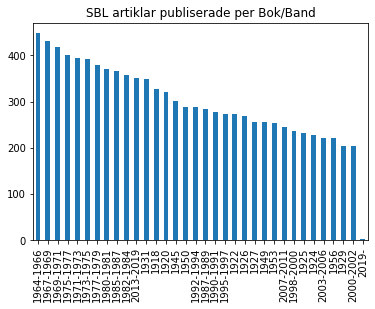

In [10]:
plotSBLYearBand.plot( kind = 'bar') 
plt.title("SBL artiklar publiserade per Bok/Band")
plt.show()

In [13]:
import matplotlib.dates as mdates  
dfSBLcsv.set_index('YearPublished',inplace=True)  
dfSBLcsv["YearPublished"] = dfSBLcsv["Year"].str[-4:] 
dfSBLcsv["YearPublished"] = dfSBLcsv["YearPublished"].astype("datetime64")
dfSBLcsv["YearPublished"].dt.strftime('%Y')
# set date as index
fig, ax = plt.subplots(figsize=(15,7))
years_fmt = mdates.DateFormatter('%M')
ax.xaxis.set_major_formatter(years_fmt) 

#plotSBLYearPublished = dfSBLcsv["YearPublished"].dt.year.value_counts().sort_index()
#plotSBLYearPublished = dfSBLcsv["YearPublished"].dt.strftime("%Y").value_counts().sort_index()
#plotSBLYearPublished.plot( kind = 'bar',ax=ax)   

#set major ticks format
#ax.xaxis_date()
#ax.autoscale_view()
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#plt.title("SBL articles published per Year 1918-2019")
#plt.savefig('SBL_published_articles_1918-2018.png')  
#plt.show()  
#plotSBLYearPublished.info

KeyError: "None of ['YearPublished'] are in the columns"

In [14]:
dfSBLcsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SBLnr      10129 non-null  int64 
 1   SBLlength  10129 non-null  int64 
 2   titel      10129 non-null  object
 3   Fodd       7080 non-null   object
 4   Dod        7563 non-null   object
 5   Band       10129 non-null  object
 6   Year       10111 non-null  object
dtypes: int64(2), object(5)
memory usage: 554.1+ KB


In [15]:
dfSBLcsv.head()

,SBLnr,SBLlength,titel,Fodd,Dod,Band,Year
0,5490,12160,"Abelin, släkt",NaN,NaN,"Band 01 (1918), sida 1.",1918
1,5491,36851,Gustaf R Abelin,Född:1819-05-17 – Linköpings Domkyrkoförsamlin...,"Död:1903-09-19 – Kvillinge församling, Östergö...","Band 01 (1918), sida 5.",1918
2,5492,46079,Hjalmar A Abelin,Född:1817-05-22 – Linköpings Domkyrkoförsamlin...,"Död:1893-09-13 – Stockholms stad, Stockholms län","Band 01 (1918), sida 1.",1918
3,5493,23231,C Rudolf Z Abelin,"Född:1864-05-30 – Malmö stad, Skåne län","Död:1961 – Västra Karups församling, Kristians...","Band 01 (1918), sida 9.",1918
4,5494,28942,P Wilhelm Abenius,"Född:1864-05-21 – Orsa församling, Dalarnas län","Död:1956 – Ramsbergs församling, Örebro län","Band 01 (1918), sida 11.",1918


In [16]:
dfSBLcsv["url"] = "https://sok.riksarkivet.se/sbl/Presentation.aspx?id=" + str(dfSBLcsv["SBLnr"])

In [17]:
#dfFamily = dfSBLAuthorcsv.dropna()  
dfPerson = dfSBLcsv.dropna(subset = ['Fodd', 'Dod'])

In [18]:
dfPerson.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7073 entries, 1 to 10126
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SBLnr      7073 non-null   int64 
 1   SBLlength  7073 non-null   int64 
 2   titel      7073 non-null   object
 3   Fodd       7073 non-null   object
 4   Dod        7073 non-null   object
 5   Band       7073 non-null   object
 6   Year       7072 non-null   object
 7   url        7073 non-null   object
dtypes: int64(2), object(6)
memory usage: 497.3+ KB


### Join Wikidata
as Wikidata we guess knows what articles are about a man and a women we can try merge 

In [28]:
dfSBLcsv['SBLnr']= dfSBLcsv['SBLnr'].astype(str).astype(int)
dfSBLcsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SBLnr      10129 non-null  int64 
 1   SBLlength  10129 non-null  int64 
 2   titel      10129 non-null  object
 3   Fodd       7080 non-null   object
 4   Dod        7563 non-null   object
 5   Band       10129 non-null  object
 6   Year       10111 non-null  object
 7   url        10129 non-null  object
dtypes: int64(2), object(6)
memory usage: 633.2+ KB


In [20]:
dfSBLcsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SBLnr      10129 non-null  int64 
 1   SBLlength  10129 non-null  int64 
 2   titel      10129 non-null  object
 3   Fodd       7080 non-null   object
 4   Dod        7563 non-null   object
 5   Band       10129 non-null  object
 6   Year       10111 non-null  object
 7   url        10129 non-null  object
dtypes: int64(2), object(6)
memory usage: 633.2+ KB


In [29]:
WDSBLtot['sblid']= WDSBLtot['sblid'].astype(str).astype(int)
WDSBLtot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7597 entries, 0 to 7596
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   wid          7597 non-null   object
 1   sblid        7597 non-null   int64 
 2   gender       7597 non-null   object
 3   genderLabel  7597 non-null   object
dtypes: int64(1), object(3)
memory usage: 237.5+ KB


In [30]:
WDSBLtot.head()

,wid,sblid,gender,genderLabel
0,Q44519,10922,http://www.wikidata.org/entity/Q6581072,kvinna
1,Q67194,5575,http://www.wikidata.org/entity/Q6581097,man
2,Q243068,11121,http://www.wikidata.org/entity/Q6581072,kvinna
3,Q364505,10453,http://www.wikidata.org/entity/Q6581097,man
4,Q445357,12878,http://www.wikidata.org/entity/Q6581097,man


In [31]:
WDSBLtot["genderLabel"].value_counts()  

man         7069
kvinna       527
transman       1
Name: genderLabel, dtype: int64

In [32]:
#WDSBLtot plotSBLYearPublished  
mergeWDSBLwebscrape = pd.merge(WDSBLtot, dfSBLcsv,how='outer',left_on='sblid', right_on='SBLnr',indicator=True)   
mergeWDSBLwebscrape.rename(columns={"_merge": "WD_Webscrape"},inplace = True)
mergeWDSBLwebscrape['WD_Webscrape'] = mergeWDSBLwebscrape['WD_Webscrape'].str.replace('left_only','WD_only').str.replace('right_only','scrape_only')
mergeWDSBLwebscrape["WD_Webscrape"].value_counts()  


both           7595
scrape_only    2535
WD_only           2
Name: WD_Webscrape, dtype: int64

In [33]:
dfWD_SBL_article = mergeWDSBLwebscrape[mergeWDSBLwebscrape.WD_Webscrape.str.contains("both")]
#dfWDSKBLarticle.YearPublished.dt.strftime("%Y") 
#dfWDSKBLarticle.info()  
dfWD_SBL_female_article = dfWD_SBL_article[dfWD_SBL_article.genderLabel.str.contains("kvinna")]
dfWD_SBL_female_article.head()  
# Year genderLabel count

,wid,sblid,gender,genderLabel,SBLnr,SBLlength,titel,Fodd,Dod,Band,Year,url,WD_Webscrape
0,Q44519,10922.0,http://www.wikidata.org/entity/Q6581072,kvinna,10922.0,103928.0,Selma O L Lagerlöf,"Född:1858-11-20 – Östra Ämterviks församling, ...","Död:1940-03-16 – Östra Ämterviks församling, V...","Band 22 (1977-1979), sida 154.",1977-1979,https://sok.riksarkivet.se/sbl/Presentation.as...,both
2,Q243068,11121.0,http://www.wikidata.org/entity/Q6581072,kvinna,11121.0,75619.0,Anne Charlotte G Leffler,"Född:1849-10-01 – Klara församling, Stockholms...",Död:1892-10-21 – Italien (i Neapel),"Band 22 (1977-1979), sida 434.",1977-1979,https://sok.riksarkivet.se/sbl/Presentation.as...,both
6,Q526915,15535.0,http://www.wikidata.org/entity/Q6581072,kvinna,15535.0,61956.0,Eugénie (C. Eugénie A. A. A.),"Född:1830-04-24 – Stockholms stad, Stockholms ...","Död:1889-04-23 – Stockholms stad, Stockholms l...","Band 14 (1953), sida 662.",1953,https://sok.riksarkivet.se/sbl/Presentation.as...,both
16,Q2925391,16949.0,http://www.wikidata.org/entity/Q6581072,kvinna,16949.0,12769.0,Brigida,NaN,Död:levde på 1100,"Band 06 (1926), sida 231.",1926,https://sok.riksarkivet.se/sbl/Presentation.as...,both
22,Q4681829,6014.0,http://www.wikidata.org/entity/Q6581072,kvinna,6014.0,35179.0,Adelaide A Skilondz,Född:1882-01-27 – Ryssland (i S:t Petersburg),"Död:1969-04-05 – Oscars församling, Stockholms...","Band 32 (2003-2006), sida 438.",2003-2006,https://sok.riksarkivet.se/sbl/Presentation.as...,both


In [36]:
# set date as index
#fig = plt.subplots(figsize=(15,7))

#plotSBLYearFemailPublished = dfWD_SBL_female_article["YearPublished"].dt.strftime("%Y").value_counts().sort_index().plot(kind='bar', color=['red'])

#plt.title("SBL articles published per Year about women 1918-2019")
#plt.savefig('SBL_published_articles_women_1918-2018.png')  
#plt.show()  
#plotSBLYearPublished.info 


In [38]:
#dfWD_SBL_female_article["YearPublished"].dt.strftime("%Y").value_counts().sort_index(ascending=False)

In [39]:
dfWD_SBL_female_article.head()

,wid,sblid,gender,genderLabel,SBLnr,SBLlength,titel,Fodd,Dod,Band,Year,url,WD_Webscrape
0,Q44519,10922.0,http://www.wikidata.org/entity/Q6581072,kvinna,10922.0,103928.0,Selma O L Lagerlöf,"Född:1858-11-20 – Östra Ämterviks församling, ...","Död:1940-03-16 – Östra Ämterviks församling, V...","Band 22 (1977-1979), sida 154.",1977-1979,https://sok.riksarkivet.se/sbl/Presentation.as...,both
2,Q243068,11121.0,http://www.wikidata.org/entity/Q6581072,kvinna,11121.0,75619.0,Anne Charlotte G Leffler,"Född:1849-10-01 – Klara församling, Stockholms...",Död:1892-10-21 – Italien (i Neapel),"Band 22 (1977-1979), sida 434.",1977-1979,https://sok.riksarkivet.se/sbl/Presentation.as...,both
6,Q526915,15535.0,http://www.wikidata.org/entity/Q6581072,kvinna,15535.0,61956.0,Eugénie (C. Eugénie A. A. A.),"Född:1830-04-24 – Stockholms stad, Stockholms ...","Död:1889-04-23 – Stockholms stad, Stockholms l...","Band 14 (1953), sida 662.",1953,https://sok.riksarkivet.se/sbl/Presentation.as...,both
16,Q2925391,16949.0,http://www.wikidata.org/entity/Q6581072,kvinna,16949.0,12769.0,Brigida,NaN,Död:levde på 1100,"Band 06 (1926), sida 231.",1926,https://sok.riksarkivet.se/sbl/Presentation.as...,both
22,Q4681829,6014.0,http://www.wikidata.org/entity/Q6581072,kvinna,6014.0,35179.0,Adelaide A Skilondz,Född:1882-01-27 – Ryssland (i S:t Petersburg),"Död:1969-04-05 – Oscars församling, Stockholms...","Band 32 (2003-2006), sida 438.",2003-2006,https://sok.riksarkivet.se/sbl/Presentation.as...,both


KeyError: 'YearPublished'

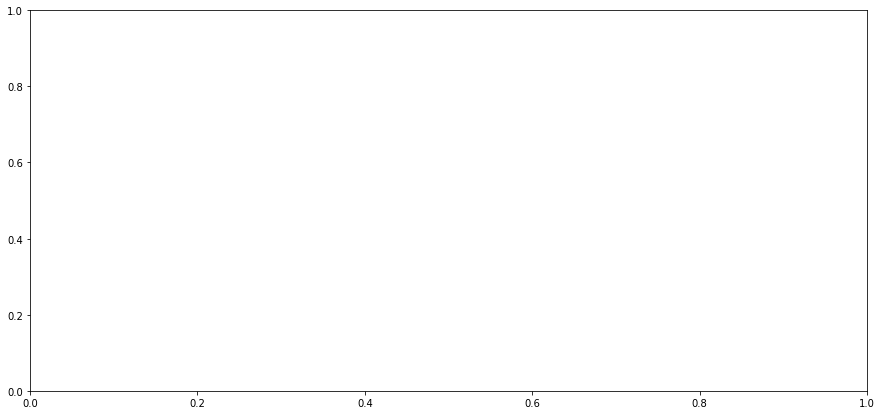

In [40]:
fig = plt.subplots(figsize=(15,7))

plotSBLYearFemailPublished = dfWD_SBL_female_article["YearPublished"].dt.strftime("%Y").value_counts().sort_index().plot(kind='bar', color=['red'])
#plotSBLYearPublished = dfSBLcsv["YearPublished"].dt.strftime("%Y").value_counts().sort_index()
plotSBLYearPublished.plot( kind = 'bar', color=['g']) 
plt.title("SBL articles published per Year all and women 1918-2019")
plt.savefig('SBL_published_articles_all_women_1918-2018.png')  
plt.show()  

In [41]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
          'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                    'lifespan': lifespan}, index=index)
#ax = df.plot.bar(rot=0)


#plotSBLYearPublished_FM = dfWD_SBL_article.groupby(["YearPublished"])
#plotSBLYearPublished_FM = dfWD_SBL_article.groupby(["YearPublished"])["genderLabel"].transform("count")
#df['Counts'] = df.groupby(['Color'])['Value'].transform('count')
#plotSBLYearPublished_FM.head()  
dfWD_SBL_article.info()
dfWD_SBL_article.head()

# Group by YearPublished genderLabel

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7595 entries, 0 to 7596
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   wid           7595 non-null   object 
 1   sblid         7595 non-null   float64
 2   gender        7595 non-null   object 
 3   genderLabel   7595 non-null   object 
 4   SBLnr         7595 non-null   float64
 5   SBLlength     7595 non-null   float64
 6   titel         7595 non-null   object 
 7   Fodd          7076 non-null   object 
 8   Dod           7554 non-null   object 
 9   Band          7595 non-null   object 
 10  Year          7594 non-null   object 
 11  url           7595 non-null   object 
 12  WD_Webscrape  7595 non-null   object 
dtypes: float64(3), object(10)
memory usage: 830.7+ KB


,wid,sblid,gender,genderLabel,SBLnr,SBLlength,titel,Fodd,Dod,Band,Year,url,WD_Webscrape
0,Q44519,10922.0,http://www.wikidata.org/entity/Q6581072,kvinna,10922.0,103928.0,Selma O L Lagerlöf,"Född:1858-11-20 – Östra Ämterviks församling, ...","Död:1940-03-16 – Östra Ämterviks församling, V...","Band 22 (1977-1979), sida 154.",1977-1979,https://sok.riksarkivet.se/sbl/Presentation.as...,both
1,Q67194,5575.0,http://www.wikidata.org/entity/Q6581097,man,5575.0,63077.0,Adolf Johan,"Född:1629-10-11 – Gryts församling (E-län), Ös...","Död:1689-10-14 – Gryts församling (E-län), Öst...","Band 01 (1918), sida 209.",1918,https://sok.riksarkivet.se/sbl/Presentation.as...,both
2,Q243068,11121.0,http://www.wikidata.org/entity/Q6581072,kvinna,11121.0,75619.0,Anne Charlotte G Leffler,"Född:1849-10-01 – Klara församling, Stockholms...",Död:1892-10-21 – Italien (i Neapel),"Band 22 (1977-1979), sida 434.",1977-1979,https://sok.riksarkivet.se/sbl/Presentation.as...,both
3,Q364505,10453.0,http://www.wikidata.org/entity/Q6581097,man,10453.0,54652.0,Bertil Lindblad,"Född:1895-11-26 – Örebro församling, Örebro län","Död:1965-06-25 – Saltsjöbadens församling, Sto...","Band 23 (1980-1981), sida 289.",1980-1981,https://sok.riksarkivet.se/sbl/Presentation.as...,both
4,Q445357,12878.0,http://www.wikidata.org/entity/Q6581097,man,12878.0,21033.0,Henrik den helige,NaN,Död:0,"Band 18 (1969-1971), sida 652.",1969-1971,https://sok.riksarkivet.se/sbl/Presentation.as...,both


### Släktartiklar  
Nedan lite gissning att en släktartikel har ordet släkt i titeln. 

* se också [webscarping Adelsvapen](https://gist.github.com/salgo60/31e0c4bf6f075c373fb5bbfb6cc807c6)
* csv lista skapad nedan på [GIST](https://gist.github.com/salgo60/31e0c4bf6f075c373fb5bbfb6cc807c6#gistcomment-3457126) 

In [42]:
dfFamily = dfSBLcsv[dfSBLcsv.isnull().any(1)]

In [43]:
dfFamily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3057 entries, 0 to 10128
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SBLnr      3057 non-null   int64 
 1   SBLlength  3057 non-null   int64 
 2   titel      3057 non-null   object
 3   Fodd       8 non-null      object
 4   Dod        491 non-null    object
 5   Band       3057 non-null   object
 6   Year       3039 non-null   object
 7   url        3057 non-null   object
dtypes: int64(2), object(6)
memory usage: 214.9+ KB


In [44]:
#dfFamily

In [45]:
dfFamilySlakt = dfFamily[dfFamily.titel.str.contains("släkt")]
#dfFamilySlakt

In [46]:
dictFamily = dfFamilySlakt.to_dict()

In [47]:
dfFamily.titel.str.contains("släkt").sum()

1721

In [48]:
dfFamily.titel.str.contains("ätten").sum()

36

In [49]:
dfFamily.titel.str.contains("Släkt").sum()

1

In [50]:
dfFamily.Dod.str.contains("senas").sum()

22

In [51]:
#dfFamily[dfFamily.Dod.str.contains("senas", na=False)]

In [52]:
dfFamily[dfFamily.Fodd.str.contains("", na=False)].head

<bound method NDFrame.head of       SBLnr  ...                                                url
165    5671  ...  https://sok.riksarkivet.se/sbl/Presentation.as...
223    5735  ...  https://sok.riksarkivet.se/sbl/Presentation.as...
459    6061  ...  https://sok.riksarkivet.se/sbl/Presentation.as...
6728  15777  ...  https://sok.riksarkivet.se/sbl/Presentation.as...
6735  15784  ...  https://sok.riksarkivet.se/sbl/Presentation.as...
6736  15785  ...  https://sok.riksarkivet.se/sbl/Presentation.as...
7673  16990  ...  https://sok.riksarkivet.se/sbl/Presentation.as...
9824  34648  ...  https://sok.riksarkivet.se/sbl/Presentation.as...

[8 rows x 8 columns]>

In [53]:
#Check diff WDSBLtot and dfSBLcsv 
WDSBLtot.duplicated(subset=['wid']).sum()

0

In [54]:
dfSBLcsv.duplicated(subset=['SBLnr']).sum()

0

In [55]:
WDSBLtot.duplicated(subset=['sblid']).sum()

1

In [56]:
WDSBLtot = WDSBLtot.rename(columns={'sblid':'SBLnr'})
WDSBLtot['SBLnr']= WDSBLtot['SBLnr'].astype(str).astype(int)
WDSBLtot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7597 entries, 0 to 7596
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   wid          7597 non-null   object
 1   SBLnr        7597 non-null   int64 
 2   gender       7597 non-null   object
 3   genderLabel  7597 non-null   object
dtypes: int64(1), object(3)
memory usage: 237.5+ KB


In [57]:
dfmerge = pd.merge(WDSBLtot, dfSBLcsv,how='outer', on='SBLnr',indicator=True)

In [58]:
dfmerge["_merge"].value_counts()

both          7595
right_only    2535
left_only        2
Name: _merge, dtype: int64

In [59]:
#dfmerge

In [60]:
dfmerge['_merge'] = dfmerge['_merge'].str.replace('left_only','WD_only').str.replace('right_only','SBL_only')


In [61]:
WDSBLonly = dfmerge[dfmerge["_merge"] == "SBL_only"].copy()   
dfmerge["_merge"].value_counts()

both        7595
SBL_only    2535
WD_only        2
Name: _merge, dtype: int64

In [62]:
WD_only = dfmerge[dfmerge["_merge"] == "WD_only"].copy()   
WD_only

,wid,SBLnr,gender,genderLabel,SBLlength,titel,Fodd,Dod,Band,Year,url,_merge
2641,Q5578497,18348,http://www.wikidata.org/entity/Q6581097,man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WD_only
4973,Q26240118,14192,http://www.wikidata.org/entity/Q6581097,man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WD_only


In [63]:
WDSBLonly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2535 entries, 7597 to 10131
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   wid          0 non-null      object 
 1   SBLnr        2535 non-null   int64  
 2   gender       0 non-null      object 
 3   genderLabel  0 non-null      object 
 4   SBLlength    2535 non-null   float64
 5   titel        2535 non-null   object 
 6   Fodd         4 non-null      object 
 7   Dod          10 non-null     object 
 8   Band         2535 non-null   object 
 9   Year         2518 non-null   object 
 10  url          2535 non-null   object 
 11  _merge       2535 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 257.5+ KB


In [64]:
WDSBLonly.titel.str.contains("släkt").sum() 


1684

In [65]:
WDSBLonly[WDSBLonly.titel.str.contains("ätt")].head

<bound method NDFrame.head of       wid  SBLnr  ...                                                url    _merge
7776  NaN   7249  ...  https://sok.riksarkivet.se/sbl/Presentation.as...  SBL_only
7947  NaN   9007  ...  https://sok.riksarkivet.se/sbl/Presentation.as...  SBL_only
7948  NaN   9008  ...  https://sok.riksarkivet.se/sbl/Presentation.as...  SBL_only
7949  NaN   9009  ...  https://sok.riksarkivet.se/sbl/Presentation.as...  SBL_only
8237  NaN  11237  ...  https://sok.riksarkivet.se/sbl/Presentation.as...  SBL_only
8238  NaN  11238  ...  https://sok.riksarkivet.se/sbl/Presentation.as...  SBL_only
8239  NaN  11239  ...  https://sok.riksarkivet.se/sbl/Presentation.as...  SBL_only
8254  NaN  11376  ...  https://sok.riksarkivet.se/sbl/Presentation.as...  SBL_only
8255  NaN  11377  ...  https://sok.riksarkivet.se/sbl/Presentation.as...  SBL_only
8256  NaN  11378  ...  https://sok.riksarkivet.se/sbl/Presentation.as...  SBL_only
8257  NaN  11379  ...  https://sok.riksarkivet.se/sbl/Pre

In [66]:
#Inte släkt 
WDmissingPerson = WDSBLonly[~WDSBLonly.titel.str.contains("släkt")]

In [67]:
WDmissingPerson.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 851 entries, 7599 to 10131
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   wid          0 non-null      object 
 1   SBLnr        851 non-null    int64  
 2   gender       0 non-null      object 
 3   genderLabel  0 non-null      object 
 4   SBLlength    851 non-null    float64
 5   titel        851 non-null    object 
 6   Fodd         4 non-null      object 
 7   Dod          10 non-null     object 
 8   Band         851 non-null    object 
 9   Year         834 non-null    object 
 10  url          851 non-null    object 
 11  _merge       851 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 86.4+ KB


In [68]:
WDmissingPerson["Year"].value_counts()

2013-2019    140
2007-2011     65
1953          53
1985-1987     44
2003-2006     36
1950          33
1931          33
1992-1994     31
1977-1979     29
1998-2000     26
1982-1984     26
1980-1981     25
1973-1975     24
1964-1966     23
1945          21
1987-1989     21
1956          20
1967-1969     20
1969-1971     20
1929          20
2000-2002     20
1949          16
1971-1973     11
1990-1991     11
1920          10
1975-1977     10
1926           9
1995-1997      8
1918           7
1925           7
1927           5
1922           4
1924           4
2019-          2
Name: Year, dtype: int64

In [69]:
print("Min, Max SBLlength: ", WDmissingPerson.SBLlength.min(), WDmissingPerson.SBLlength.max())

Min, Max SBLlength:  11021.0 82050.0


In [70]:
# sorterar artiklarna efter sidstorlek för att kanske hitta någon vi missat  
# wid är Wikidata objekt , NaN är att det saknas  
# SBLnr är id i SBL
# SBLlength är sidans storlek hos SBL 
# Fodd, Dod... är det jag hittade i WEBsidan, NaN innebär saknas

#WDmissingPerson.sort_values(by='SBLlength', ascending=False, na_position='first')

In [71]:
WDmissingPerson["Year"].value_counts()

2013-2019    140
2007-2011     65
1953          53
1985-1987     44
2003-2006     36
1950          33
1931          33
1992-1994     31
1977-1979     29
1998-2000     26
1982-1984     26
1980-1981     25
1973-1975     24
1964-1966     23
1945          21
1987-1989     21
1956          20
1967-1969     20
1969-1971     20
1929          20
2000-2002     20
1949          16
1971-1973     11
1990-1991     11
1920          10
1975-1977     10
1926           9
1995-1997      8
1918           7
1925           7
1927           5
1922           4
1924           4
2019-          2
Name: Year, dtype: int64

In [72]:
print("End run: ", datetime.now())

End run:  2021-03-08 22:15:30.730038


In [73]:
#Släkt 
#WDSlakt = WDSBLonly[~WDSBLonly.titel.str.contains("släkt")].copy

In [74]:
WDSlakt = WDSBLonly[WDSBLonly.titel.str.contains("släkt")]

In [75]:
WDSlakt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1684 entries, 7597 to 10085
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   wid          0 non-null      object 
 1   SBLnr        1684 non-null   int64  
 2   gender       0 non-null      object 
 3   genderLabel  0 non-null      object 
 4   SBLlength    1684 non-null   float64
 5   titel        1684 non-null   object 
 6   Fodd         0 non-null      object 
 7   Dod          0 non-null      object 
 8   Band         1684 non-null   object 
 9   Year         1684 non-null   object 
 10  url          1684 non-null   object 
 11  _merge       1684 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 171.0+ KB


In [76]:
#Need a workaround as pandas to_csv dont work ?!?!?
for  index,row in WDSlakt.iterrows():
#    print(row["SBLnr"],row["titel"],row["Year"],row["url"])    
#    print(row["SBLnr"],"|",row["titel"],"|",row["Year"])  

SyntaxError: unexpected EOF while parsing (<ipython-input-76-e33fe5db66b3>, line 4)

List produced also on [GIST](https://gist.github.com/salgo60/31e0c4bf6f075c373fb5bbfb6cc807c6#gistcomment-3457126) 

### Estimate published articles male/female /family


In [77]:
dfmerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10132 entries, 0 to 10131
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   wid          7597 non-null   object 
 1   SBLnr        10132 non-null  int64  
 2   gender       7597 non-null   object 
 3   genderLabel  7597 non-null   object 
 4   SBLlength    10130 non-null  float64
 5   titel        10130 non-null  object 
 6   Fodd         7080 non-null   object 
 7   Dod          7564 non-null   object 
 8   Band         10130 non-null  object 
 9   Year         10112 non-null  object 
 10  url          10130 non-null  object 
 11  _merge       10132 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 1.0+ MB


In [78]:
personSBL = dfmerge[~dfmerge['wid'].isnull()] 

In [79]:
personSBL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7597 entries, 0 to 7596
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   wid          7597 non-null   object 
 1   SBLnr        7597 non-null   int64  
 2   gender       7597 non-null   object 
 3   genderLabel  7597 non-null   object 
 4   SBLlength    7595 non-null   float64
 5   titel        7595 non-null   object 
 6   Fodd         7076 non-null   object 
 7   Dod          7554 non-null   object 
 8   Band         7595 non-null   object 
 9   Year         7594 non-null   object 
 10  url          7595 non-null   object 
 11  _merge       7597 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 771.6+ KB


In [81]:
#plotSBLGender = personSBL.groupby(["genderLabel", "YearPublished"]).size()
#plotSBLGender  

In [82]:
#plotSBLGender.unstack()